***GRIP : The Sparks Foundation***

***M.Anas Ahmed Khan***

**Task 2 = Prediction using Unsupervised ML**

***From Iris dataset, predict the optimum number of clusters***

In [ ]:
# importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# importing datasets

iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)

X = iris.data
y = iris.target

dataset.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


***Exploratory Data Analysis (EDA)***

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isnull().sum() # Total null values in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***Data Correlation***

In [ ]:
dataset.corr().style.background_gradient(cmap = 'Purples')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


***Numerical Data Distribution***

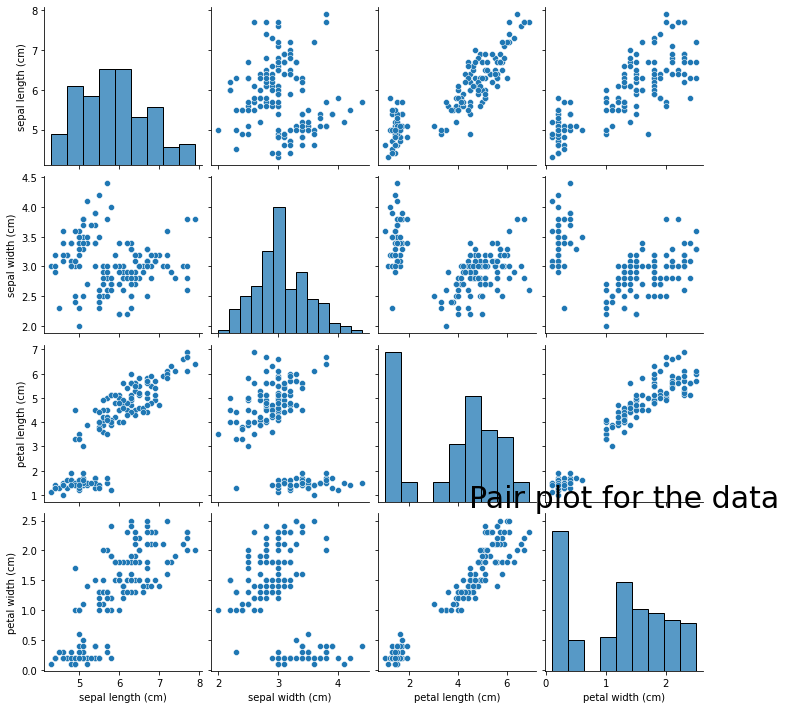

In [ ]:
plt.rcParams['figure.figsize'] = (40,41)
sns.pairplot(dataset, palette = 'husl')
plt.title('Pair plot for the data' , fontsize = 30) 
plt.show()

***Using PCA to reduce the dimentionality***

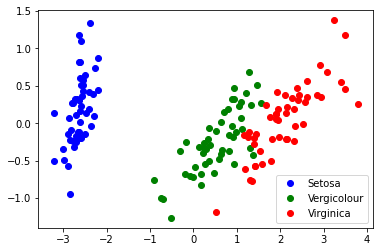

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
X_centered = X - X.mean(axis = 0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

#Plotting the results of PCA
plt.plot(X_pca[y == 0,0], X_pca[y == 0,1], 'bo', label = 'Setosa')
plt.plot(X_pca[y == 1,0], X_pca[y == 1,1], 'go', label = 'Vergicolour')
plt.plot(X_pca[y == 2,0], X_pca[y == 2,1], 'ro', label = 'Virginica')
plt.legend(loc = 0);

In [ ]:
# Finding the optimim number of clusters for K-Means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

***Using elbow method***

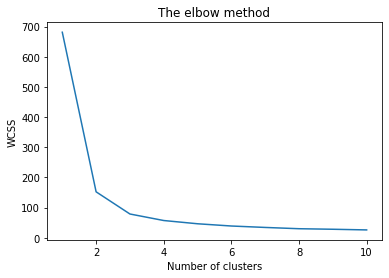

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***K-Means Clustering***

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)                            

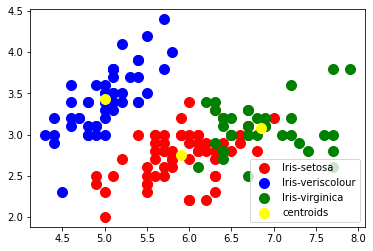

In [ ]:
#Visualizing the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-veriscolour')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'centroids')
plt.legend()